# Ground Beetle Taxonomy, Version 2

## Question

Given a sample of N beetles in which M are correctly classified, what is the likelihood that the true success rate for classifying beetles (P) is equal to or greater than the threshold T?

## Methodology

* Consider a range of values of P between 0.0 and 1.0.
* For each value of P (0, 0.01, 0.02, .. , 0.99, 1.00) perform n_trials realizations of a binomial function with probability P and sample size N.  Track the number of such realizations that yield an outcome of M successes.
* For the entire set of outcomes that yield a value of M successes, compute how many of these correspond to cases in which P>T.
* If n_M is the number of realizations that yielded M successes, and n_T is the subset of those n_M realizations for which P>T, then the fraction n_T/n_M gives the probability that P>T given M successes in N trials.

In [1]:
import numpy as np
from numpy.random import binomial

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams.update({'font.size': 22})

### Define a function to count the number of realizations that yield exactly M successes

In [3]:
def count_m( n, p, m, ntrials):
    '''
    Given a binomial function with success probability p and sample size n, perform
    ntrials simulations and return the number of these trials in which the outcome was
    exactly m successes.
    '''
    s = np.random.binomial(n, p, ntrials)
    good, = np.where ( s == m)
    n_m = len(good)
    return n_m

In [4]:
# Test this function on a coin flip, 10 trials...
n = 10
p = 0.5
ntrials = 1000
for m in range(0,11):
    print "m=%d n(m)=%d" % (m, count_m( n, p, m, ntrials))

m=0 n(m)=0
m=1 n(m)=8
m=2 n(m)=50
m=3 n(m)=125
m=4 n(m)=211
m=5 n(m)=224
m=6 n(m)=196
m=7 n(m)=141
m=8 n(m)=52
m=9 n(m)=8
m=10 n(m)=1


Given that we have a 50/50 chance of success, the fact that 5 heads is the most common result is as expected.

### Define a function to construct the list of all outcomes yielding M successes

In [5]:
def count_all( n, m, ntrials, debug=False):
    '''
    Given a binomial function of sample size n which yields m successes,
    perform ntrials realizations at a variety of p values and return an array
    listing the probability values corresponding to outcomes that yield 
    exactly m successes.
    '''
    
    # allocate a set of p values to test...
    start = 0.0
    stop  = 1.0
    num = 101
    pvals = np.linspace( start, stop, num=num)

    # create an array "a" to compile the list of cases in which the outcome is exactly M successes...
    maxsize = ntrials*num
    a = np.zeros(maxsize)
    
    i = 0
    for p in pvals:
        
        # count the number of times in the ntrials realizations 
        # that we got m successful outcomes out of n attempts...
        c = count_m( n, p, m, ntrials)
        if debug:
                print "p=%.3f count=%d" % (p,c)
        
        # add c new elements to the "good" array...
        while c > 0:
            a[i] = p
            i += 1
            c -= 1
            
    if i > 0:
        return a[0:i]
    else:
        return None

### Test case: what can we infer about the probability distribution of P when we get 5 "heads" in 10 coin flips?

(0, 1)

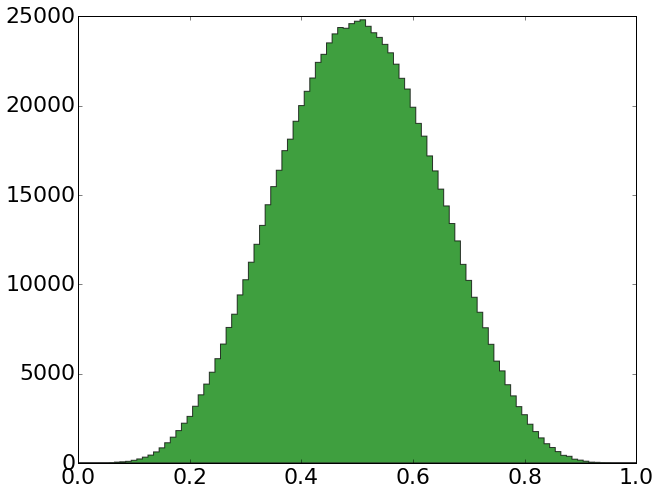

In [6]:
# test case
n = 10
m = 5
ntrials = 100000
pvals = count_all( n, m, ntrials)

# define bins...
minbin = 0.
maxbin = 1.0
nbins = 101
binwidth = (maxbin-minbin)/(nbins-1)
nedges = nbins+1
b = np.zeros(nedges)
for i in range(0,nedges):
    b[i] = minbin + (i-0.5)*binwidth

binvals, binlocs, patches = plt.hist( pvals, bins=b, histtype='stepfilled')
foo = plt.setp( patches, 'facecolor', 'g', 'alpha', 0.75)
plt.xlim([0,1])

# print len(a), a

As expected, getting 5 heads in 10 flips leads to the conclusion that the most likely value of P is 0.5, but with a large spread.

### Test case: what can we infer about the probability distribution of P when we get 95 beetles correct out of 100?

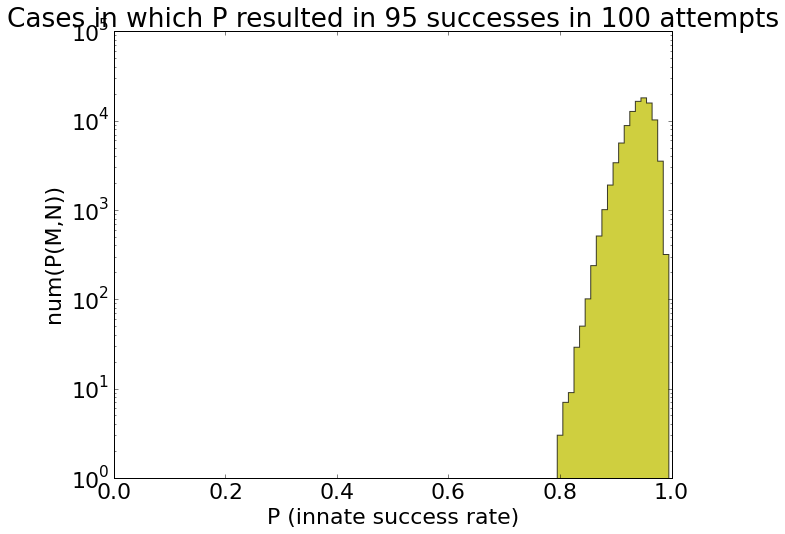

In [7]:
# test case
n = 100
m = 95
ntrials = 100000
pvals = count_all( n, m, ntrials)

# define bins...
minbin = 0.
maxbin = 1.0
nbins = 101
binwidth = (maxbin-minbin)/(nbins-1)
nedges = nbins+1
b = np.zeros(nedges)
for i in range(0,nedges):
    b[i] = minbin + (i-0.5)*binwidth

binvals, binlocs, patches = plt.hist( pvals, bins=b, histtype='stepfilled')
foo = plt.setp( patches, 'facecolor', 'y', 'alpha', 0.75)
plt.xlim([0.,1.])
plt.xlabel("P (innate success rate)")
plt.ylabel("num(P(M,N))")
plt.title("Cases in which P resulted in 95 successes in 100 attempts")
plt.yscale('log')
plt.show()

# print len(a), a

### Define a function to indicate the probability that P>T

In [8]:
def prob_p_ge_t( n, m, t, ntrials):
    '''
    Given a binomial function for which one obtains m successes in a sample size of n,
    return the probability that the true success rate (p) is equal to or greater than
    the threshold value t, based on realizations involving sample size ntrials.
    '''

    # generate an array listing all P values for which we get m successes in n trials...
    pvals = count_all( n, m, ntrials)
    
    # count the number of these outcomes for which p>=t...
    good, = np.where( pvals >= t)
    
    n_good = len(good)
    n_pvals = len(pvals)
    prob = float(n_good)/float(n_pvals)
    return prob

In [9]:
# test case: if I flip a coin 10 times and get 5 heads, then what is the likelihood that P>0.5?
n = 10
m = 5
threshold = 0.5
for ntrials in (100,1000,10000,100000):
    print ntrials, prob_p_ge_t( n, m, threshold, ntrials)

100 0.502863688431
1000 0.523751387347
10000 0.512924704349
100000 0.513506851094


We get a result very close to 50%.  Close enough?

### Real case

If I classify m beetles correctly in a sample size of 100, what is the chance that my true success fraction is at least 95%?

In [10]:
n = 100
threshold = 0.95
ntrials = 1000
m = range(0,101)
mcount = len(m)
p = np.zeros(mcount)
for i in range(0,mcount):
    p[i] = prob_p_ge_t( n, m[i], threshold, ntrials)
    print i, m[i], p[i]

0 0 0.0
1 1 0.0
2 2 0.0
3 3 0.0
4 4 0.0
5 5 0.0
6 6 0.0
7 7 0.0
8 8 0.0
9 9 0.0
10 10 0.0
11 11 0.0
12 12 0.0
13 13 0.0
14 14 0.0
15 15 0.0
16 16 0.0
17 17 0.0
18 18 0.0
19 19 0.0
20 20 0.0
21 21 0.0
22 22 0.0
23 23 0.0
24 24 0.0
25 25 0.0
26 26 0.0
27 27 0.0
28 28 0.0
29 29 0.0
30 30 0.0
31 31 0.0
32 32 0.0
33 33 0.0
34 34 0.0
35 35 0.0
36 36 0.0
37 37 0.0
38 38 0.0
39 39 0.0
40 40 0.0
41 41 0.0
42 42 0.0
43 43 0.0
44 44 0.0
45 45 0.0
46 46 0.0
47 47 0.0
48 48 0.0
49 49 0.0
50 50 0.0
51 51 0.0
52 52 0.0
53 53 0.0
54 54 0.0
55 55 0.0
56 56 0.0
57 57 0.0
58 58 0.0
59 59 0.0
60 60 0.0
61 61 0.0
62 62 0.0
63 63 0.0
64 64 0.0
65 65 0.0
66 66 0.0
67 67 0.0
68 68 0.0
69 69 0.0
70 70 0.0
71 71 0.0
72 72 0.0
73 73 0.0
74 74 0.0
75 75 0.0
76 76 0.0
77 77 0.0
78 78 0.0
79 79 0.0
80 80 0.0
81 81 0.0
82 82 0.0
83 83 0.0
84 84 0.0
85 85 0.0
86 86 0.0
87 87 0.0
88 88 0.00210970464135
89 89 0.00785854616896
90 90 0.0187637969095
91 91 0.051652892562
92 92 0.0940695296524
93 93 0.195740365112
94 94 0.

### Plot results

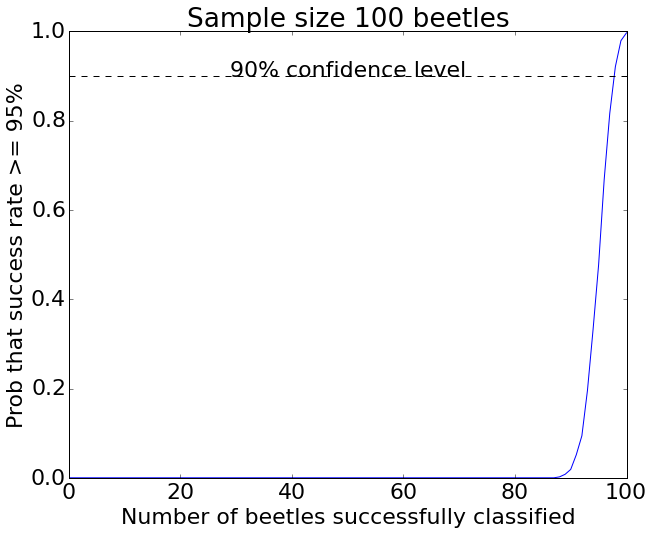

In [11]:
line1, = plt.plot(m, p, 'b-')
line2, = plt.plot([0,100],[0.9,0.9],'k--')
plt.xlabel('Number of beetles successfully classified')
plt.ylabel('Prob that success rate >= %d%%' % (np.around(100.*threshold)))
plt.title('Sample size 100 beetles')
plt.text(50,0.9,'90% confidence level',horizontalalignment='center')
plt.show()

### Define a function to return probability vs. % of beetles successfully classified

In [12]:
def prob_p_ge_t_pct( n, threshold, ntrials):
    '''
    Given a binomial function of size n, consider a range of successful outcomes
    and return an array given the confidence that P>threshold.
    '''

    # define an array of success fractions from 0-1...
    svals = np.linspace(0.0,1.0,num=100)
    n_s = len(svals)
    
    # define array to hold results...
    p = np.zeros(n_s)
    for i in range(0,n_s):
        s = svals[i]
        m = np.around(s*n)
        p[i] = prob_p_ge_t( n, m, threshold, ntrials)
        
    return svals,p

### Define a function to locate the X value where the line reaches a value of Y

In [13]:
# use interpolation to get 90% confidence levels...
def ginterp(y0,xp,yp,up=True):
    '''
    Given array of points (xp,yp), return the x0 value 
    that corresponds to the point where the curve crosses y0.
    '''
    nx = len(xp)
    ny = len(yp)
    
    # sanity check on array size...
    if nx != ny:
        raise ValueError('array sizes do not match')

    for j in range(0,nx):
        i = j-1

        # define whether to seek an "up" or "down" crossing...
        if up:
            found_crossing = yp[j] > y0
        else:
            found_crossing = yp[j] < y0
            
        # take action if crossing found...
        if found_crossing:
            if j == 0:
                return None
            else:
                dx = xp[j]-xp[i]
                dy = yp[j]-yp[i]
                t = (y0-yp[i])/dy
                return xp[i]+t*dx
    
    # transition not found...
    return None

## Real case: testing whether we achieve 95% success

Given a certain sample size, how many beetles must we identify correctly in order to be 90% certain that our success probability is at least 95%?

In [14]:
# test case...
threshold = 0.95
ntrials = 10000
n1 = 50
s1,p1 = prob_p_ge_t_pct( n1, threshold, ntrials)
n2 = 100
s2,p2 = prob_p_ge_t_pct( n2, threshold, ntrials)
n3 = 1000
s3,p3 = prob_p_ge_t_pct( n3, threshold, ntrials)

In [15]:
# Find values corresponding to 90% confidence...
y0 = 0.9
x1 = ginterp(y0,s1,p1)
x2 = ginterp(y0,s2,p2)
x3 = ginterp(y0,s3,p3)
format = "For N=%d, need %.1f%% correct (max of %d failures) to achieve %d%% confidence."
print format % (n1, x1*100, (1-x1)*n1, y0*100)
print format % (n2, x2*100, (1-x2)*n2, y0*100)
print format % (n3, x3*100, (1-x3)*n3, y0*100)

For N=50, need 99.7% correct (max of 0 failures) to achieve 90% confidence.
For N=100, need 97.8% correct (max of 2 failures) to achieve 90% confidence.
For N=1000, need 95.7% correct (max of 43 failures) to achieve 90% confidence.


In [16]:
def mylabel(n):
    return "N=%d" % n

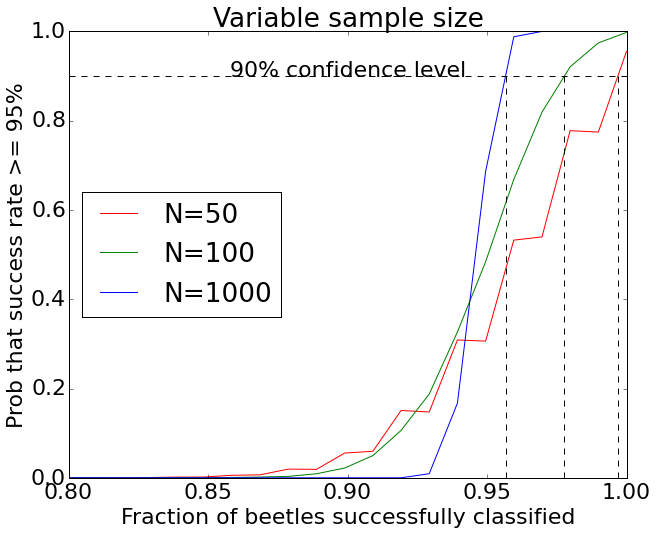

In [17]:
# draw lines...
line1, = plt.plot(s1, p1, 'r-', label=mylabel(n1))
line2, = plt.plot(s2, p2, 'g-', label=mylabel(n2))
line3, = plt.plot(s3, p3, 'b-', label=mylabel(n3))

# draw annotations...
xmin = 0.8
xmax = 1.0
ymin = 0.0
ymax = 1.0
foo = plt.plot([xmin,xmax], [y0,y0], 'k--')
foo = plt.plot([x1,x1], [y0,ymin], 'k--')
foo = plt.plot([x2,x2], [y0,ymin], 'k--')
foo = plt.plot([x3,x3], [y0,ymin], 'k--')
plt.text(0.5*(xmin+xmax),0.9,'90% confidence level',horizontalalignment='center')


plt.xlim([xmin,xmax])
plt.xlabel('Fraction of beetles successfully classified')
plt.ylabel('Prob that success rate >= %d%%' % (np.around(100.*threshold)))
plt.title('Variable sample size')
plt.legend(loc=6)
plt.show()

In [18]:
# test case...
threshold = 0.80
n = 50
s1,p1 = prob_p_ge_t_pct( n1, threshold, ntrials)
n = 100
s2,p2 = prob_p_ge_t_pct( n2, threshold, ntrials)
n = 1000
s3,p3 = prob_p_ge_t_pct( n3, threshold, ntrials)

In [19]:
# Find values corresponding to 90% confidence...
y0 = 0.9
x1 = ginterp(y0,s1,p1)
x2 = ginterp(y0,s2,p2)
x3 = ginterp(y0,s3,p3)
format = "For N=%d, need %.1f%% correct (max of %d failures) to achieve %d%% confidence."
print format % (n1, x1*100, (1-x1)*n1, y0*100)
print format % (n2, x2*100, (1-x2)*n2, y0*100)
print format % (n3, x3*100, (1-x3)*n3, y0*100)

For N=50, need 87.6% correct (max of 6 failures) to achieve 90% confidence.
For N=100, need 84.8% correct (max of 15 failures) to achieve 90% confidence.
For N=1000, need 81.3% correct (max of 187 failures) to achieve 90% confidence.


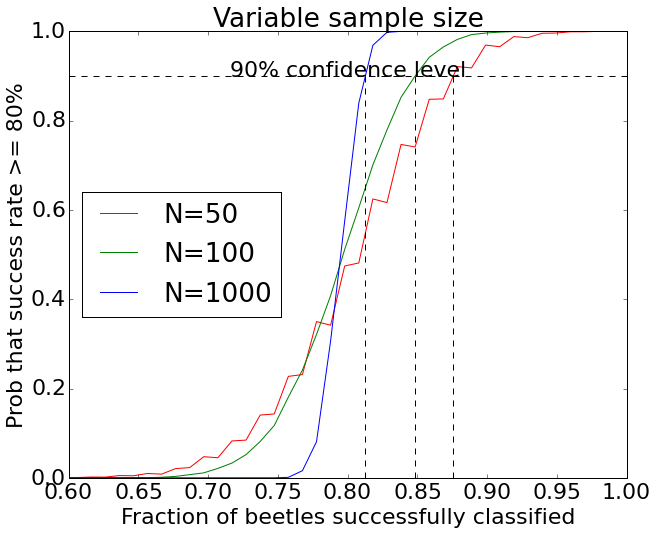

In [20]:
# draw lines...
line1, = plt.plot(s1, p1, 'r-', label=mylabel(n1))
line2, = plt.plot(s2, p2, 'g-', label=mylabel(n2))
line3, = plt.plot(s3, p3, 'b-', label=mylabel(n3))

# draw annotations...
xmin = 0.6
xmax = 1.0
ymin = 0.0
ymax = 1.0
foo = plt.plot([xmin,xmax], [y0,y0], 'k--')
foo = plt.plot([x1,x1], [y0,ymin], 'k--')
foo = plt.plot([x2,x2], [y0,ymin], 'k--')
foo = plt.plot([x3,x3], [y0,ymin], 'k--')
plt.text(0.5*(xmin+xmax),0.9,'90% confidence level',horizontalalignment='center')

plt.xlim([xmin,xmax])
plt.xlabel('Fraction of beetles successfully classified')
plt.ylabel('Prob that success rate >= %d%%' % (np.around(100.*threshold)))
plt.title('Variable sample size')
plt.legend(loc=6)
plt.show()